<a href="https://colab.research.google.com/github/joedetDS/palmoil-prediction-system/blob/main/OilAdulteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
#Processing
import pandas as pd
import numpy as np

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#feature selection
from sklearn.feature_selection import RFE

#Metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

#scale the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Load and save models
import pickle

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#block warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset

df = pd.read_csv("/content/palm_oil_adulteration_dataset.csv")

In [3]:
# display the first five rows

df.head()

,Fatty_Acid_Palmitic,Fatty_Acid_Oleic,Peroxide_Value,Free_Fatty_Acid,Iodine_Value,Saponification_Value,Color_Index,Density,Viscosity,Class
0,42.483571,41.609923,5.497572,2.620787,53.430196,194.166230,3.406332,0.914268,71.079766,Adulterated
1,39.308678,41.372687,2.442269,2.890510,56.936044,194.022702,8.004208,0.915654,98.595698,Pure
2,43.238443,30.634855,2.005306,0.191751,69.402035,203.655248,2.112258,0.880674,98.227851,Pure
3,47.615149,42.359278,2.319864,3.585014,65.615757,206.516338,7.027282,0.895916,47.428669,Adulterated
4,38.829233,50.862633,9.160171,3.590732,55.651817,204.317332,7.423542,0.891517,37.164572,Adulterated


In [4]:
df.shape

(5000, 10)

In [34]:
df.describe()

,palmitic_acid,oleic_acid,peroxide_value,free_fatty_acid,iodine_value,saponification_value,color_index,density,viscosity,class
count,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000
mean,40.073229,44.849368,7.600417,2.410935,60.401621,200.016901,6.507387,0.890058,64.821634,0.455251
std,4.940727,8.179187,3.952288,1.393038,5.579683,5.778229,3.142982,0.020741,20.441727,0.498068
min,23.793663,13.620798,1.003534,0.100236,50.002205,190.001350,1.000061,0.800688,30.021771,0.000000
25%,36.813362,39.344880,4.253550,1.227896,55.857404,194.955087,3.768939,0.875924,46.617639,0.000000
50%,40.121033,44.827594,7.444028,2.349362,60.565094,199.976243,6.548476,0.889542,64.914404,0.000000
75%,43.316964,50.460682,10.782505,3.576184,65.068574,205.034608,9.211658,0.904254,82.843639,1.000000
max,59.631189,73.232441,14.997272,4.994248,69.991968,209.994642,11.997683,0.964557,99.996987,1.000000


In [5]:
X = df.drop(columns = "Class")
y = df["Class"]# display the columns

df.columns

Index(['Fatty_Acid_Palmitic', 'Fatty_Acid_Oleic', 'Peroxide_Value',
       'Free_Fatty_Acid', 'Iodine_Value', 'Saponification_Value',
       'Color_Index', 'Density', 'Viscosity', 'Class'],
      dtype='object')

In [6]:
#rename the columns to something concise

df.columns = ['palmitic_acid', 'oleic_acid', 'peroxide_value', 'free_fatty_acid',
              'iodine_value', 'saponification_value', 'color_index',
              'density', 'viscosity', 'class']

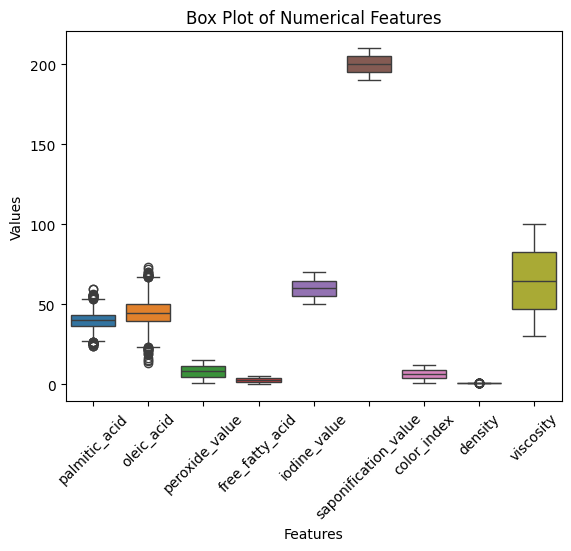

In [7]:
# Extract numerical features (excluding the 'class' column)
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Create a box plot for all numerical features
sns.boxplot(data=numerical_features)

# Add labels and title
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Display the plot
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.show()

In [8]:
#display the first five and last five rows

df

,palmitic_acid,oleic_acid,peroxide_value,free_fatty_acid,iodine_value,saponification_value,color_index,density,viscosity,class
0,42.483571,41.609923,5.497572,2.620787,53.430196,194.166230,3.406332,0.914268,71.079766,Adulterated
1,39.308678,41.372687,2.442269,2.890510,56.936044,194.022702,8.004208,0.915654,98.595698,Pure
2,43.238443,30.634855,2.005306,0.191751,69.402035,203.655248,2.112258,0.880674,98.227851,Pure
3,47.615149,42.359278,2.319864,3.585014,65.615757,206.516338,7.027282,0.895916,47.428669,Adulterated
4,38.829233,50.862633,9.160171,3.590732,55.651817,204.317332,7.423542,0.891517,37.164572,Adulterated
...,...,...,...,...,...,...,...,...,...,...
4995,39.755175,55.408817,14.865378,3.446395,52.642313,197.599088,8.668331,0.885466,83.639450,Pure
4996,43.557053,29.013240,10.102494,4.264566,54.744645,201.858462,11.905196,0.922575,83.695938,Adulterated
4997,55.564551,39.357466,2.779670,1.157045,62.854946,203.434104,7.525281,0.869242,46.628917,Pure
4998,44.040181,48.966125,8.086381,3.793749,51.037522,202.903401,2.120905,0.877599,54.681949,Adulterated


In [9]:
# check for imbalance in the class

df["class"].value_counts()

,count
class,
Adulterated,3474
Pure,1526


In [10]:
# Separate the classes
adulterated = df[df['class'] == 'Adulterated']
pure = df[df['class'] == 'Pure']

# Downsample the majority class (Adulterated)
adulterated_downsampled = adulterated.sample(n=len(pure)+300, random_state=42)

# Combine the downsampled majority class with the minority class
balanced_df = pd.concat([pure, adulterated_downsampled])

# Shuffle the combined dataset
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution
print(balanced_df['class'].value_counts())

class
Adulterated    1826
Pure           1526
Name: count, dtype: int64


class
Adulterated    1826
Pure           1526
Name: count, dtype: int64


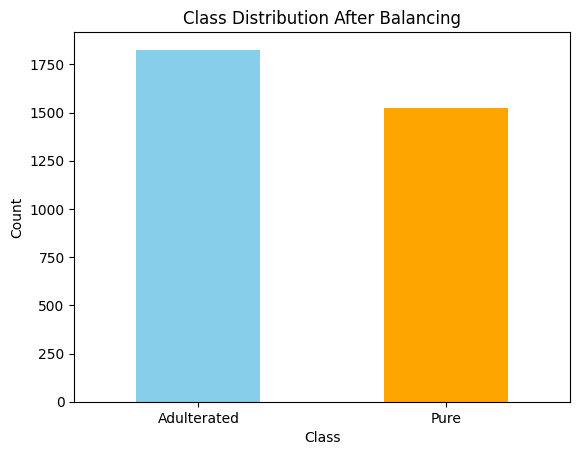

In [36]:
# Verify the class distribution
class_counts = balanced_df['class'].value_counts()
print(class_counts)

# Generate a bar chart for the class distribution
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Encoded the Target Columns

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'class' column
df['class'] = label_encoder.fit_transform(df['class'])

In [12]:
df["class"]

,class
0,0
1,1
2,0
3,1
4,0
...,...
3347,1
3348,1
3349,1
3350,1


# Label Encoding Info

## PURE -------> 1
## ADULTERATED ------> 0

In [13]:
# display the correlation

df.corr()

,palmitic_acid,oleic_acid,peroxide_value,free_fatty_acid,iodine_value,saponification_value,color_index,density,viscosity,class
palmitic_acid,1.000000,0.002590,-0.012036,0.010616,-0.006667,-0.001255,-0.013608,-0.012171,0.017707,-0.005755
oleic_acid,0.002590,1.000000,0.008009,0.001769,0.022733,0.011532,0.008403,0.013721,0.019948,-0.024674
peroxide_value,-0.012036,0.008009,1.000000,0.070511,-0.038541,-0.002241,-0.044323,0.004062,0.034025,-0.363633
free_fatty_acid,0.010616,0.001769,0.070511,1.000000,-0.059144,-0.015609,-0.029333,0.009157,-0.010091,-0.416686
iodine_value,-0.006667,0.022733,-0.038541,-0.059144,1.000000,0.022117,-0.003662,-0.005262,-0.028647,0.254354
saponification_value,-0.001255,0.011532,-0.002241,-0.015609,0.022117,1.000000,-0.005056,-0.015043,-0.017698,0.015333
color_index,-0.013608,0.008403,-0.044323,-0.029333,-0.003662,-0.005056,1.000000,0.015177,0.011431,0.009202
density,-0.012171,0.013721,0.004062,0.009157,-0.005262,-0.015043,0.015177,1.000000,0.004869,0.017542
viscosity,0.017707,0.019948,0.034025,-0.010091,-0.028647,-0.017698,0.011431,0.004869,1.000000,-0.031885
class,-0.005755,-0.024674,-0.363633,-0.416686,0.254354,0.015333,0.009202,0.017542,-0.031885,1.000000


# Seperate Feature and Target variables

In [14]:
X = df.drop(columns = "class")
y = df["class"]

In [15]:
#split to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [16]:
#Standardize the dataset

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[-0.24474626, -0.96165808, -1.20432778, ...,  0.93747161,
         1.23130529,  0.67308658],
       [-0.12857305,  0.12878783,  0.19151399, ..., -1.40759842,
        -1.00914928,  0.4747417 ],
       [-0.63054635, -0.78807989,  1.00351157, ..., -1.18909043,
         0.14103161,  0.62432643],
       ...,
       [ 1.80160132,  0.83081152, -0.30105088, ..., -1.53421575,
         0.26688706,  0.34300648],
       [-0.59585541, -0.8164768 ,  0.83007995, ...,  0.27142852,
        -0.06628049,  0.26200389],
       [ 0.16666446, -0.42194751, -0.30385579, ..., -0.13223166,
        -0.0283891 ,  1.30870322]])

In [18]:
X_test

array([[ 1.5799137 , -0.30696271,  1.55807959, ...,  1.72175303,
         0.01211614,  0.39482973],
       [ 1.08182279, -0.98222653,  1.26648332, ..., -0.24679559,
        -0.32789911, -1.58052143],
       [ 0.50764346,  0.58539729,  1.39780091, ..., -0.7866701 ,
         0.52499269, -0.87578017],
       ...,
       [-0.40815492, -0.8967633 , -0.07215945, ...,  1.08818857,
         0.16800444, -0.84460758],
       [-0.61680423, -1.14037705,  1.71335319, ..., -1.29478993,
        -0.42278137,  0.05617518],
       [ 0.62990538, -1.91454094,  1.66946669, ...,  0.48480178,
        -0.196777  , -1.28614585]])

# Pipelining System

In [19]:
# import rfe(recursive feature elimination)

from sklearn.feature_selection import RFE

In [20]:
def train_and_evaluate(X_train, X_test, y_train, y_test, n_features_to_select=6):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Support Vector Machine": SVC(kernel='linear'),
        "Random Forest": RandomForestClassifier()
    }

    metrics_data = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1-Score': [], 'Misclassification': []}

    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
        X_test = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])

    for model_name, model in models.items():
        selector = RFE(model, n_features_to_select=n_features_to_select)
        selector = selector.fit(X_train, y_train)

        selected_features = X_train.columns[selector.support_]
        print(f"Selected features for {model_name}: {selected_features}")

        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)

        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        misclassification = 1 - acc

        metrics_data['Model'].append(model_name)
        metrics_data['Accuracy'].append(acc)
        metrics_data['Recall'].append(recall)
        metrics_data['Precision'].append(precision)
        metrics_data['F1-Score'].append(f1)
        metrics_data['Misclassification'].append(misclassification)

        if model_name == "Random Forest":
            filename = "random_forest_model.pkl"
            with open(filename, 'wb') as file:
                pickle.dump(model, file)
            print(f"Saved Random Forest model as {filename}")

            # Display confusion matrix for Random Forest
            rf_confusion_matrix = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix, display_labels=np.unique(y_test))
            disp.plot(cmap='viridis')
            plt.title(f'Confusion Matrix for Random Forest')
            plt.show()

    metrics_df = pd.DataFrame(metrics_data)

    # Visualize metrics for all models
    print("\nMetrics for all models:")
    print(metrics_df)

    return metrics_df


Selected features for Logistic Regression: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_7',
       'feature_8'],
      dtype='object')
Selected features for Support Vector Machine: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_8'],
      dtype='object')
Selected features for Random Forest: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_8'],
      dtype='object')
Saved Random Forest model as random_forest_model.pkl


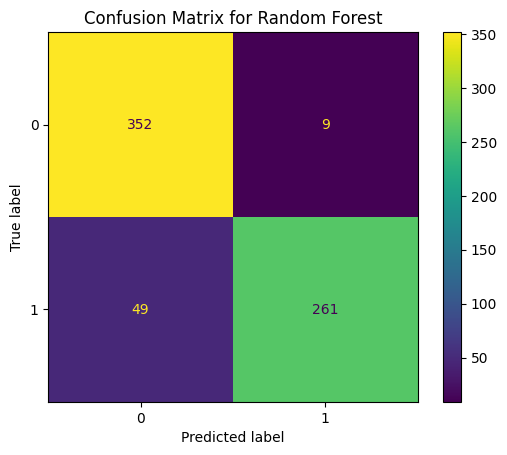


Metrics for all models:
                    Model  Accuracy    Recall  Precision  F1-Score  \
0     Logistic Regression  0.771982  0.769404   0.771056  0.770019   
1  Support Vector Machine  0.767511  0.764110   0.767074  0.765026   
2           Random Forest  0.913562  0.908502   0.922236  0.911942   

   Misclassification  
0           0.228018  
1           0.232489  
2           0.086438  


In [21]:
#run the pipelining function to get the metrics

metrics_df = train_and_evaluate(X_train, X_test, y_train, y_test)

In [22]:
metrics_df

,Model,Accuracy,Recall,Precision,F1-Score,Misclassification
0,Logistic Regression,0.771982,0.769404,0.771056,0.770019,0.228018
1,Support Vector Machine,0.767511,0.764110,0.767074,0.765026,0.232489
2,Random Forest,0.913562,0.908502,0.922236,0.911942,0.086438


In [23]:
# Plotting function for performance metrics
def plot_metrics(metrics_df):
    metrics_df.set_index('Model').plot(kind='bar', figsize=(15, 7))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

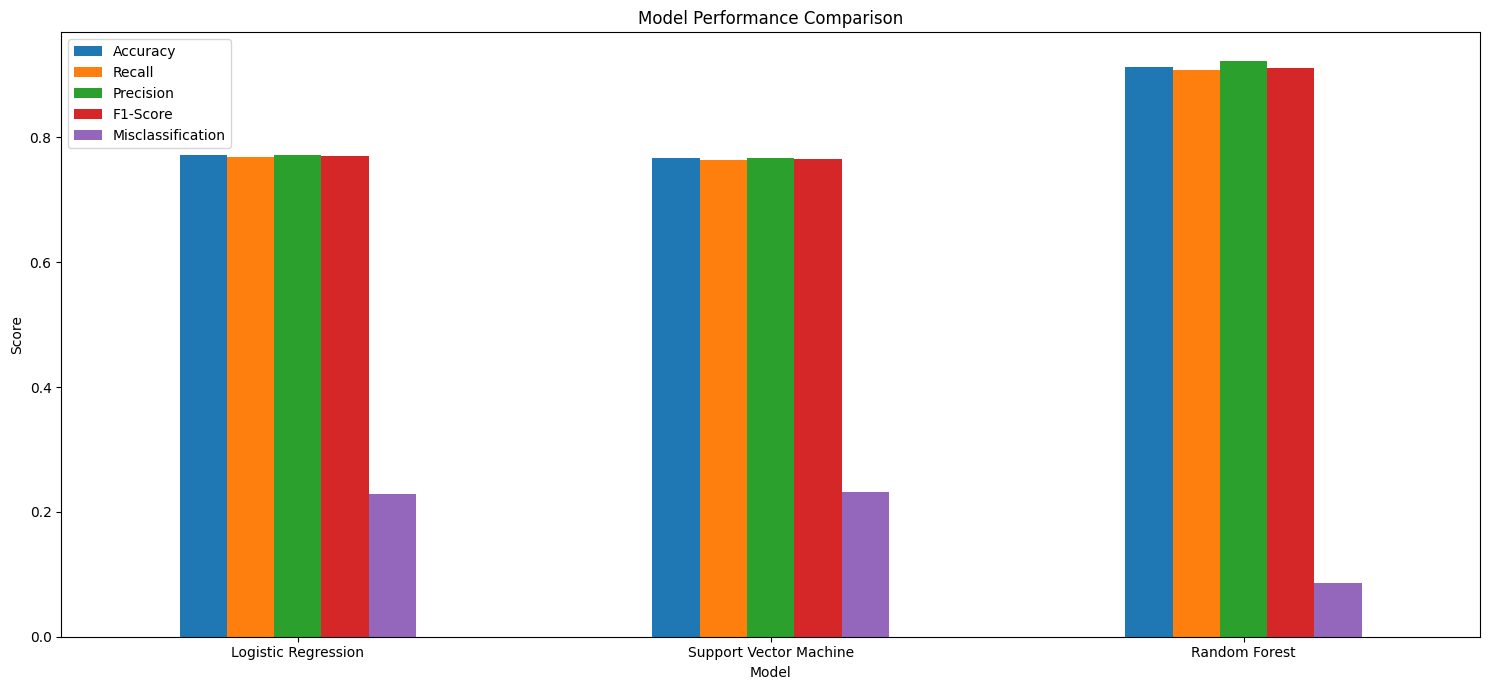

In [24]:
# diplay metrics

plot_metrics(metrics_df)

# Tests on Single Data

# Rf TESTING

In [25]:
with open("random_forest_model.pkl", 'rb') as file:
    loaded_rf = pickle.load(file)


In [26]:
df.head(1)

,palmitic_acid,oleic_acid,peroxide_value,free_fatty_acid,iodine_value,saponification_value,color_index,density,viscosity,class
0,29.043731,38.231683,11.872379,3.088151,58.110337,199.717112,8.516656,0.886172,57.09254,0


In [27]:
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_8']

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_8']

In [28]:
# Random Forest selected features
rf_selected_features = ['oleic_acid', 'peroxide_value',
                        'free_fatty_acid', 'iodine_value', 'saponification_value','viscosity']

# Extract the first user's features based on Random Forest's selected features
first_user = df.loc[531, rf_selected_features]  # Extract first row (index 0), selecting relevant columns
print("Features for first user:", first_user)

Features for first user: oleic_acid               60.466878
peroxide_value            8.331721
free_fatty_acid           3.973413
iodine_value             59.241936
saponification_value    203.320469
viscosity                30.842437
Name: 531, dtype: float64


In [29]:
df_scaled = scaler.fit_transform(df[rf_selected_features])  # Fit and transform the whole dataset
first_user_scaled = scaler.transform([first_user])          # Transform the single user row

print("Scaled features for first user:", first_user_scaled)

Scaled features for first user: [[ 1.90970575  0.18506066  1.12180041 -0.20787153  0.57181189 -1.66249492]]


In [30]:
# Make a prediction for the first user
prediction = loaded_rf.predict(first_user_scaled)

In [31]:
# Display the prediction
print("Prediction for the first user:", prediction[0])

Prediction for the first user: 0


In [32]:
df.sample(10)

,palmitic_acid,oleic_acid,peroxide_value,free_fatty_acid,iodine_value,saponification_value,color_index,density,viscosity,class
293,46.484973,39.240084,2.597607,2.996246,65.515116,197.763046,5.526127,0.877956,61.402779,1
1089,37.827519,54.417480,4.507622,2.237709,67.549299,203.967856,11.793622,0.888273,97.451510,1
2648,41.137300,40.407195,7.738345,1.493660,56.103877,195.877421,3.007471,0.916871,35.860486,1
2419,29.674585,44.845454,13.166659,0.886756,62.013778,193.572840,9.502208,0.879643,93.210680,0
2201,40.734676,48.037597,2.937192,1.732701,68.722520,200.660658,7.638630,0.876660,38.664047,1
686,46.173760,54.731579,3.479632,2.678423,67.416105,195.451011,2.953701,0.899389,46.624903,1
2036,39.612783,41.911818,9.182579,3.839630,56.588695,205.854740,4.109035,0.891935,77.403385,0
2909,39.630262,45.432413,4.022130,3.016074,67.907833,192.145819,8.102944,0.884502,53.384304,0
1265,40.967950,50.495653,8.284849,0.360057,67.020532,190.319943,6.376343,0.898125,72.529052,1
669,44.288298,46.340561,9.149699,2.432282,64.655237,198.888829,10.504096,0.884617,97.293396,1
